# Offline diagnostics for the CASTLE single output networks following Rasp et al. (2018) architecture

# Shapley Values

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printe
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

In [3]:
module_path = os.path.abspath(os.path.join('..'))
# Relative imports
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-07-28 10:34:19.780297: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Num GPUs Available:  0


In [6]:
from utils.setup import SetupDiagnostics
from neural_networks.load_models import load_models, get_save_plot_folder
from neural_networks.model_diagnostics import ModelDiagnostics


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [7]:
from pathlib import Path

## Load trained CASTLE models

In [8]:
argv  = ["-c", "../output_castle/training_7_mirrored/cfg_castle_NN_Creation.yml"]
plot_dir = Path("../output_castle/training_7_mirrored/plots_offline_evaluation/shapley/")

In [9]:
castle_setup = SetupDiagnostics(argv)

In [10]:
castle_models = load_models(castle_setup)


Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_7_mirrored/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-distributed/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_0_model.h5

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_7_mirrored/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-distributed/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_1_model.h5

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_7_mirrored/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-distributed/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_2_model.h5

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_7_mirrored/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-distributed/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_3_model.h5

Load model: /work/bd1179/b309247/pychar

In [11]:
len(castle_models['castleNN'])

65

In [12]:
# Note: keys are variables not strings
castle_models['castleNN'].keys()

dict_keys(['tphystnd-3.64', 'tphystnd-7.59', 'tphystnd-14.36', 'tphystnd-24.61', 'tphystnd-38.27', 'tphystnd-54.6', 'tphystnd-72.01', 'tphystnd-87.82', 'tphystnd-103.32', 'tphystnd-121.55', 'tphystnd-142.99', 'tphystnd-168.23', 'tphystnd-197.91', 'tphystnd-232.83', 'tphystnd-273.91', 'tphystnd-322.24', 'tphystnd-379.1', 'tphystnd-445.99', 'tphystnd-524.69', 'tphystnd-609.78', 'tphystnd-691.39', 'tphystnd-763.4', 'tphystnd-820.86', 'tphystnd-859.53', 'tphystnd-887.02', 'tphystnd-912.64', 'tphystnd-936.2', 'tphystnd-957.49', 'tphystnd-976.33', 'tphystnd-992.56', 'phq-3.64', 'phq-7.59', 'phq-14.36', 'phq-24.61', 'phq-38.27', 'phq-54.6', 'phq-72.01', 'phq-87.82', 'phq-103.32', 'phq-121.55', 'phq-142.99', 'phq-168.23', 'phq-197.91', 'phq-232.83', 'phq-273.91', 'phq-322.24', 'phq-379.1', 'phq-445.99', 'phq-524.69', 'phq-609.78', 'phq-691.39', 'phq-763.4', 'phq-820.86', 'phq-859.53', 'phq-887.02', 'phq-912.64', 'phq-936.2', 'phq-957.49', 'phq-976.33', 'phq-992.56', 'fsnt', 'fsns', 'flnt', 'fl

## Shapley Values

In [13]:
# This variable does not exist in the code (but key nn_type is the same)
castle_model_type = "castleNN"
castle_setup.model_type = castle_model_type

In [14]:
castle_md = ModelDiagnostics(setup=castle_setup, 
                             models=castle_models[castle_model_type]) 

In [15]:
castle_md

In [20]:
model, inputs = castle_models[castle_model_type][var]
model

In [22]:
import numpy as np

In [41]:
background = np.ones((5, 1, 94), dtype=np.float32)
y_background = np.zeros((5, 1, 1), dtype=np.float32)

In [43]:
background_dict = [{"x_input": x[:, inputs], "y_target": y} for x, y in zip(background, y_background)]

In [54]:
background_dict[0]["x_input"].shape

(1, 94)

In [51]:
background_ds = tf.data.Dataset.from_tensor_slices((background, y_background))
background_ds = background_ds.map(lambda x, y: {"x_input": x, "y_target": y})

In [52]:
for el in background_ds.take(1):
    print(el["x_input"].shape)
    print(el["y_target"].shape)

(1, 94)
(1, 1)


In [53]:
model(background_dict[0])

<tf.Tensor: shape=(95, 1, 1), dtype=float32, numpy=
array([[[ 2.3197489e+01]],

       [[-1.7123803e-02]],

       [[ 2.9765107e-03]],

       [[-2.4940496e-02]],

       [[-2.5149283e-01]],

       [[-1.2983833e-01]],

       [[-9.5212832e-03]],

       [[-5.4262407e-02]],

       [[ 6.6029020e-03]],

       [[ 5.1152002e-02]],

       [[ 8.6967135e-03]],

       [[ 1.2546568e-02]],

       [[ 1.7367049e-01]],

       [[ 4.1707411e-01]],

       [[ 4.7295529e-01]],

       [[ 3.4653240e-01]],

       [[-1.1597416e-01]],

       [[ 1.1416300e-01]],

       [[ 4.3593270e-01]],

       [[ 2.6229573e-02]],

       [[-1.9779652e-01]],

       [[ 9.2773400e-02]],

       [[-9.1440044e-03]],

       [[-2.5875822e-01]],

       [[ 1.3124308e-02]],

       [[-6.8973064e-02]],

       [[-4.8295863e-02]],

       [[-2.2489318e-01]],

       [[ 1.0110052e-01]],

       [[-1.3433897e-01]],

       [[ 4.6266168e-01]],

       [[-2.1077576e-01]],

       [[-3.1439912e-01]],

       [[-7.4659511e-02]

In [55]:
model.predict(background_ds)

5/5 [==============================] - 0s 11ms/step


array([[[ 2.3197489e+01]],

       [[-1.7123803e-02]],

       [[ 2.9765107e-03]],

       [[-2.4940496e-02]],

       [[-2.5149283e-01]],

       [[-1.2983833e-01]],

       [[-9.5212832e-03]],

       [[-5.4262411e-02]],

       [[ 6.6029015e-03]],

       [[ 5.1152002e-02]],

       [[ 8.6967135e-03]],

       [[ 1.2546568e-02]],

       [[ 1.7367049e-01]],

       [[ 4.1707411e-01]],

       [[ 4.7295529e-01]],

       [[ 3.4653234e-01]],

       [[-1.1597416e-01]],

       [[ 1.1416300e-01]],

       [[ 4.3593270e-01]],

       [[ 2.6229573e-02]],

       [[-1.9779652e-01]],

       [[ 9.2773400e-02]],

       [[-9.1440044e-03]],

       [[-2.5875819e-01]],

       [[ 1.3124308e-02]],

       [[-6.8973064e-02]],

       [[-4.8295863e-02]],

       [[-2.2489318e-01]],

       [[ 1.0110053e-01]],

       [[-1.3433897e-01]],

       [[ 4.6266168e-01]],

       [[-2.1077576e-01]],

       [[-3.1439915e-01]],

       [[-7.4659511e-02]],

       [[ 9.4589591e-03]],

       [[-4.3083656e

In [26]:
model(background_dict)

ValueError: Layer "castleNN" expects 2 input(s), but it received 10 input tensors. Inputs received: [<tf.Tensor: shape=(94,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, <tf.Tensor: shape=(94,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, <tf.Tensor: shape=(94,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, <tf.Tensor: shape=(94,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, <tf.Tensor: shape=(94,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>]

### Single Variable

In [16]:
from utils.variable import Variable_Lev_Metadata

In [17]:
var = Variable_Lev_Metadata.parse_var_name("prect")

In [38]:
i_time = 'range'
metric = 'abs_mean' # 'mean', 'abs_mean', 'abs_mean_sign'
n_time = 1440 # 1440 # ~1-month
n_samples = 5 # 1024; 2048; 4096; 8192 # int(setup.batch_size*8) # batch_size (1024) * 8 = SPCAM grid (128*64=8192)

shap_values_mean, inputs, input_vars_dict = castle_md.get_shapley_values('range', var, nTime=n_time, nSamples=n_samples, metric=metric)


Training batch size = 1024.
Validation batch size = 8192.


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


ValueError: Input 0 of layer "castleNN" is incompatible with the layer: expected shape=(None, 95), found shape=(1024, 94)

In [36]:
shap_values_mean

NameError: name 'shap_values_mean' is not defined

In [35]:
from utils.plotting import plot_matrix, plot_matrix_insets

Plotting double_xy for variable prect
Validation batch size = 8192.


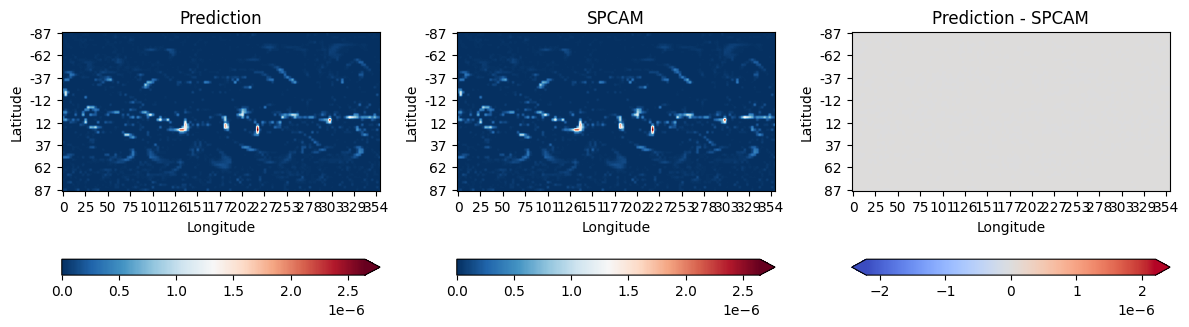

In [19]:
def plot_matrix_shap(
    clima_case,
    nn_case,
    metric,
    input_dict_inv_remap_var, 
    dict_outputs_idxs,
    shap_matrix,
    diff=False,
    save=False,
    savenm=False,
    cmap=False,
    extend=False,
    interpolation='none',
    insets=False,
    **kwargs
):

    argv   = ["-c", f"./cfg_shap_matrix.yml"]
    setup  = SetupDiagnostics(argv)
    
    # Miscellaneous for plotting
    in_vars, in_box_idx, in_ticks, in_ticks_labs = get_matrix_insets_idx(
        input_dict_inv_remap_var, 
        inverted=True,
    )
    out_vars, out_box_idx, out_ticks, out_ticks_labs = get_matrix_insets_idx(
        dict_outputs_idxs,
        insets=insets
    )


    # Plotting
    if diff is False and 'abs' in metric and 'sign' not in metric:
        # norm = colors.LogNorm(vmin=0., vmax=shap_matrix.max())
        # norm = colors.SymLogNorm(linthresh=0.002, linscale=1.,vmin=shap_matrix.min(), vmax=shap_matrix.max(), base=10)
        norm = colors.SymLogNorm(linthresh=0.002, linscale=1.,vmin=0., vmax=shap_matrix.max(), base=10)
        # norm = colors.PowerNorm(gamma=0.2)
        if not cmap: cmap='Reds'
        if not extend: extend='max'
        # return shap_matrix
    else:
        maximum = max(abs(shap_matrix.max()), abs(shap_matrix.min()))
        vmax=maximum; vmin=-1*maximum
        norm = colors.SymLogNorm(linthresh=0.002, linscale=1.,vmin=vmin, vmax=vmax, base=10)
        # norm = colors.SymLogNorm(linthresh=0.002, linscale=1.,vmin=-1., vmax=1., base=10)
        if not cmap: cmap='RdBu_r'
        if not extend: extend='both'
    cbar_label='SHAP values'
    if insets:
        out_vars_2d, out_vars_2d_ticks = get_matrix_2d_idx(dict_outputs_idxs)
        fig, ax = plot_matrix_insets(
                    setup.pc_alphas[0],
                    shap_matrix,
                    in_vars,
                    in_box_idx,
                    in_ticks, 
                    in_ticks_labs,
                    out_vars,
                    out_box_idx,
                    out_ticks, 
                    out_ticks_labs,
                    out_vars_2d, 
                    out_vars_2d_ticks,
                    extend,
                    cbar_label,
                    dict_outputs_idxs=dict_outputs_idxs,
                    mask=False,
                    num_parents=False,
                    # vmin=vmin,
                    # vmax=vmax,
                    cmap=cmap,
                    # norm=colors.CenteredNorm(),
                    # norm=colors.SymLogNorm(linthresh=0.002, linscale=1.,vmin=-1., vmax=1., base=10)
                    norm=norm,
                    interpolation=interpolation,
                )
    else:
        fig, ax = plot_matrix(
                    setup.pc_alphas[0],
                    shap_matrix,
                    in_vars,
                    in_box_idx,
                    in_ticks, 
                    in_ticks_labs,
                    out_vars,
                    out_box_idx,
                    out_ticks, 
                    out_ticks_labs,
                    extend,
                    cbar_label,
                    mask=False,
                    num_parents=False,
                    # vmin=vmin,
                    # vmax=vmax,
                    cmap=cmap,
                    # norm=colors.CenteredNorm(),
                    # norm=colors.SymLogNorm(linthresh=0.002, linscale=1.,vmin=-1., vmax=1., base=10)
                    norm=norm,
                    interpolation=interpolation,
                )
    
    if save:
        Path(save).mkdir(parents=True, exist_ok=True)
        f'SHAP_values_{nn_case}_{clima_case}.png' if not savenm else savenm
        fig.savefig(f"{save}/{savenm}",dpi=3000.,bbox_inches='tight')
        print(f"{save}/{savenm}")

In [20]:
_ = castle_md.plot_double_xy(1, var, diff=True, nTime=False, cmap="RdBu_r", save=plot_dir, show_plot=False)


Plotting double_xy for variable prect
Validation batch size = 8192.
Saved plot prect_map_time-1_diff.png.
Closed plot for variable prect


Plotting double_xy for variable prect
Validation batch size = 8192.
Time samples: 90


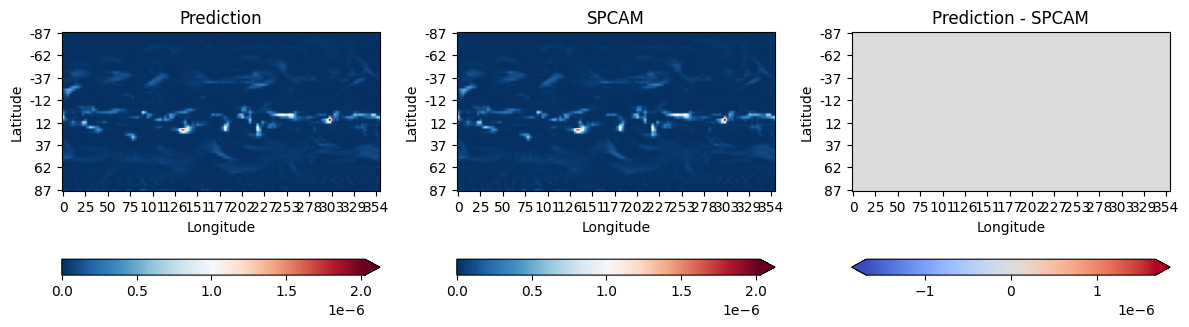

In [21]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90
fig, axes = castle_md.plot_double_xy("mean", var, diff=True, nTime=90, cmap="RdBu_r")
fig.show()

### All variables

#### Time step 1 without diff

In [23]:
i_time = 1

save_dir = Path(plot_dir, f"step-{itime}_no_diff")
Path(save_dir).mkdir(parents=True, exist_ok=True)

for var in castle_models[castle_model_type].keys():
    print(var)
    _ = castle_md.plot_double_xy(i_time, var, diff=False, nTime=False, cmap="RdBu_r", show_plot=False, save=save_dir)

tphystnd-3.64
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-3.64_map_time-1.png.
Closed plot for variable tphystnd-3.64
tphystnd-7.59
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-7.59_map_time-1.png.
Closed plot for variable tphystnd-7.59
tphystnd-14.36
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-14.36_map_time-1.png.
Closed plot for variable tphystnd-14.36
tphystnd-24.61
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-24.61_map_time-1.png.
Closed plot for variable tphystnd-24.61
tphystnd-38.27
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-38.27_map_time-1.png.
Closed plot for variable tphystnd-38.27
tphystnd-54.6
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-54.6_map_time-1.png.
Closed plot for variable tphystnd-54.6
t

#### Time step 1 with diff

In [24]:
i_time = 1

save_dir = Path(plot_dir, f"step-{itime}_with_diff")
Path(save_dir).mkdir(parents=True, exist_ok=True)

for var in castle_models[castle_model_type].keys():
    print(var)
    _ = castle_md.plot_double_xy(i_time, var, diff=True, nTime=False, cmap="RdBu_r", save=save_dir)

tphystnd-3.64
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-3.64_map_time-1_diff.png.
Closed plot for variable tphystnd-3.64
tphystnd-7.59
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-7.59_map_time-1_diff.png.
Closed plot for variable tphystnd-7.59
tphystnd-14.36
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-14.36_map_time-1_diff.png.
Closed plot for variable tphystnd-14.36
tphystnd-24.61
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-24.61_map_time-1_diff.png.
Closed plot for variable tphystnd-24.61
tphystnd-38.27
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-38.27_map_time-1_diff.png.
Closed plot for variable tphystnd-38.27
tphystnd-54.6
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-54.6_map_time-1_diff.png.
Closed plo

#### Mean without diff

In [25]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90 
# Or: 120 as Nando did
n_time = 90

save_dir = Path(plot_dir, f"mean_{n_time}-steps_no_diff")
Path(save_dir).mkdir(parents=True, exist_ok=True)

for var in castle_models[castle_model_type].keys():
    print(var)
    _ = castle_md.plot_double_xy("mean", var, diff=False, nTime=90, cmap="RdBu_r", show_plot=False, save=save_dir)

tphystnd-3.64
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-3.64_map_time-mean.png.
Closed plot for variable tphystnd-3.64
tphystnd-7.59
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-7.59_map_time-mean.png.
Closed plot for variable tphystnd-7.59
tphystnd-14.36
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-14.36_map_time-mean.png.
Closed plot for variable tphystnd-14.36
tphystnd-24.61
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-24.61_map_time-mean.png.
Closed plot for variable tphystnd-24.61
tphystnd-38.27
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-38.27_map_time-mean.png.
Closed plot for variable tphystnd-38.27
tphystnd-54.6
Plotting double_xy for variable tphystnd
Validation 

#### Mean with diff

In [27]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90
n_time = 90

save_dir = Path(plot_dir, f"mean_{n_time}-steps_with_diff")
Path(save_dir).mkdir(parents=True, exist_ok=True)

for var in castle_models[castle_model_type].keys():
    print(var)
    _ = castle_md.plot_double_xy("mean", var, diff=True, nTime=n_time, cmap="RdBu_r", show_plot=False, save=save_dir)

tphystnd-3.64
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-3.64_map_time-mean_diff.png.
Closed plot for variable tphystnd-3.64
tphystnd-7.59
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-7.59_map_time-mean_diff.png.
Closed plot for variable tphystnd-7.59
tphystnd-14.36
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-14.36_map_time-mean_diff.png.
Closed plot for variable tphystnd-14.36
tphystnd-24.61
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-24.61_map_time-mean_diff.png.
Closed plot for variable tphystnd-24.61
tphystnd-38.27
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-38.27_map_time-mean_diff.png.
Closed plot for variable tphystnd-38.27
tphystnd-54.6
Plotting double_xy for vari